In [20]:
# 📌 1. Import Libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 📂 2. Load Merged Dataset
df = pd.read_csv("../data/merged_orders_products.csv")
df["order_date"] = pd.to_datetime(df["order_date"])

# 🧹 3. Keep necessary columns
df = df[["customer_id", "order_id", "product_name", "order_date"]]
df = df.sort_values(by=["customer_id", "order_date"])


# 📁 11. Save for reporting
# frequent_itemsets.to_csv("../outputs/rules/frequent_itemsets.csv", index=False)
# top_rules.to_csv("../outputs/rules/top_association_rules.csv", index=False)
# print("\n✅ Results saved to 'outputs/rules/' folder.")


In [26]:
# 📦 4. Simulate baskets by grouping every 3 orders per customer
def generate_baskets(df, n_orders=3):
    df["order_rank"] = df.groupby("customer_id")["order_date"].rank(method="first").astype(int)
    df["basket_id"] = df["customer_id"].astype(str) + "_basket_" + ((df["order_rank"] - 1) // n_orders + 1).astype(str)

    return df

In [32]:
df = generate_baskets(df, n_orders=2)

In [34]:
# 🛒 5. Create transaction list (list of products per basket)
basket_groups = df.groupby("basket_id")["product_name"].apply(list)
transactions = basket_groups.tolist()

# 🔁 6. Encode transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# 📊 7. Apply Apriori Algorithm
frequent_itemsets = apriori(basket_df, min_support=0.002, use_colnames=True)

# 🧠 8. Extract Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 🔍 9. Filter top rules
top_rules = rules.sort_values(by="lift", ascending=False).head(10)

# ✅ 10. Display Results
print("📦 Frequent Itemsets:")
display(frequent_itemsets.sort_values(by="support", ascending=False).head(10))

print("\n🔗 Top Association Rules:")
display(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])


📦 Frequent Itemsets:


,support,itemsets
34,0.073931,(Pet Treats)
43,0.064931,(Toilet Cleaner)
14,0.060752,(Cough Syrup)
27,0.059466,(Lotion)
46,0.058502,(Vitamins)
18,0.057859,(Dish Soap)
1,0.056252,(Baby Wipes)
7,0.048859,(Cat Food)
37,0.043716,(Pulses)
4,0.043073,(Bread)



🔗 Top Association Rules:


,antecedents,consequents,support,confidence,lift


In [36]:
df.groupby("basket_id")["product_name"].count().describe()


count    3111.000000
mean        1.607200
std         0.488451
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: product_name, dtype: float64

In [44]:
print("Sample baskets:")
print(transactions[:5])


Sample baskets:
[['Cookies', 'Spinach'], ['Nuts', 'Detergent'], ['Baby Wipes', 'Frozen Vegetables'], ['Pet Treats', 'Lotion'], ['Cheese', 'Cat Food']]


In [42]:
print("📦 Frequent Itemsets:")
display(frequent_itemsets.sort_values(by="support", ascending=False).head(10))


📦 Frequent Itemsets:


,support,itemsets
35,0.074050,(Pet Treats)
45,0.065035,(Toilet Cleaner)
14,0.060850,(Cough Syrup)
27,0.059562,(Lotion)
48,0.058596,(Vitamins)
18,0.057952,(Dish Soap)
1,0.056343,(Baby Wipes)
7,0.048938,(Cat Food)
38,0.043786,(Pulses)
4,0.043142,(Bread)


In [74]:
# 📌 1. Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# 📂 2. Load Merged Dataset
df = pd.read_csv("../data/merged_orders_products.csv")
df["order_date"] = pd.to_datetime(df["order_date"])

# 🧹 3. Keep necessary columns
df = df[["customer_id", "order_id", "product_name", "order_date"]]
df = df.sort_values(by=["customer_id", "order_date"])

# 📦 4. Simulate Baskets by Grouping Every 2 Orders per Customer
def generate_baskets(df, n_orders=2):
    df["order_rank"] = df.groupby("customer_id")["order_date"].rank(method="first").astype(int)
    df["basket_id"] = df["customer_id"].astype(str) + "_basket_" + ((df["order_rank"] - 1) // n_orders + 1).astype(str)
    return df

df = generate_baskets(df, n_orders=2)

# 🔍 5. Filter to Top 50 Most Purchased Products
top_products = df["product_name"].value_counts().head(100).index
df = df[df["product_name"].isin(top_products)]

# 🛒 6. Create transaction list (list of products per basket)
basket_groups = df.groupby("basket_id")["product_name"].apply(list)
transactions = basket_groups.tolist()

# 🔁 7. Encode transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# 📊 8. Apply Apriori Algorithm
frequent_itemsets = apriori(basket_df, min_support=0.001, use_colnames=True)

# 🧠 9. Generate Association Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# 🧹 10. Filter and sort top rules
top_rules = rules.sort_values(by="lift", ascending=False).head(20)

# ✅ 11. Display Outputs
print("📦 Frequent Itemsets:")
display(frequent_itemsets.sort_values(by="support", ascending=False).head(10))

print("\n🔗 Top Association Rules:")
display(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])




📦 Frequent Itemsets:


,support,itemsets
36,0.073931,(Pet Treats)
46,0.064931,(Toilet Cleaner)
14,0.060752,(Cough Syrup)
28,0.059466,(Lotion)
49,0.058502,(Vitamins)
18,0.057859,(Dish Soap)
1,0.056252,(Baby Wipes)
7,0.048859,(Cat Food)
39,0.043716,(Pulses)
4,0.043073,(Bread)



🔗 Top Association Rules:


,antecedents,consequents,support,confidence,lift
65,(Milk),(Soap),0.001286,0.142857,4.883830
64,(Soap),(Milk),0.001286,0.043956,4.883830
24,(Carrots),(Curd),0.001607,0.050505,2.152345
25,(Curd),(Carrots),0.001607,0.068493,2.152345
63,(Lotion),(Mango Drink),0.002572,0.043243,1.978378
62,(Mango Drink),(Lotion),0.002572,0.117647,1.978378
39,(Orange Juice),(Chips),0.001929,0.051724,1.893103
38,(Chips),(Orange Juice),0.001929,0.070588,1.893103
29,(Salt),(Cat Food),0.001607,0.083333,1.705592
28,(Cat Food),(Salt),0.001607,0.032895,1.705592


C:\Users\Pratik\AppData\Local\Temp\ipykernel_19372\564763346.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


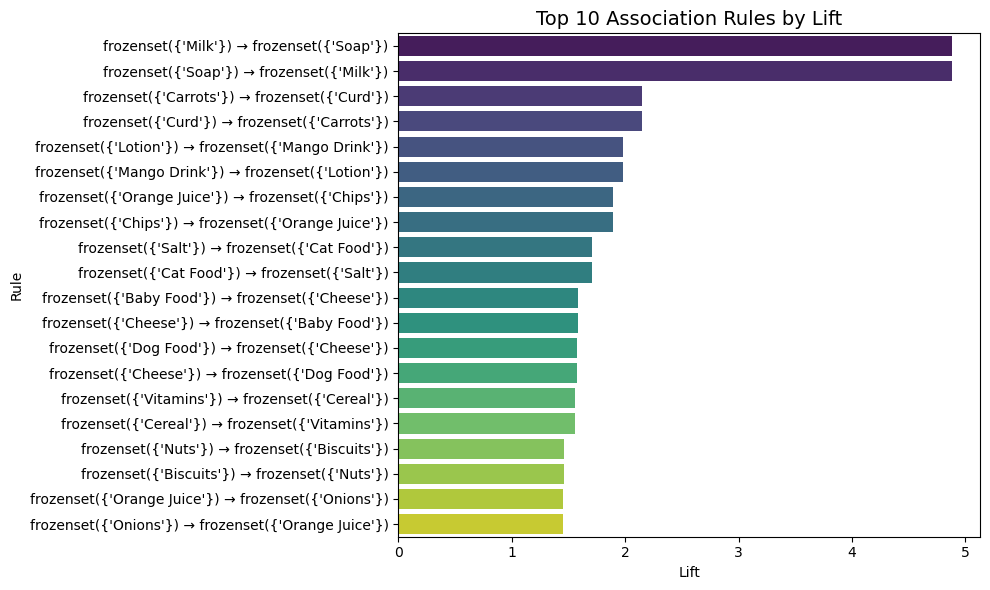

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = rules.sort_values(by="lift", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(
    x=top_10["lift"],
    y=top_10["antecedents"].astype(str) + " → " + top_10["consequents"].astype(str),
    palette="viridis"
)
plt.title("Top 10 Association Rules by Lift", fontsize=14)
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.tight_layout()
plt.show()



In [80]:
# 💾 12. Save Outputs
frequent_itemsets.to_csv("../output/rules/frequent_itemsets.csv", index=False)
top_rules.to_csv("../output/rules/top_association_rules.csv", index=False)
print("\n✅ Saved frequent itemsets and rules to '../output/rules/'")


✅ Saved frequent itemsets and rules to '../output/rules/'


In [82]:
rules["rule"] = rules["antecedents"].astype(str) + " → " + rules["consequents"].astype(str)
rules[["rule", "support", "confidence", "lift"]].sort_values("lift", ascending=False).head(10).to_csv("../output/rules/top_rules_readable.csv", index=False)


In [ ]:
!streamlit run ../app.py